# SIT742: Modern Data Science 
**(2020 Assessment Task 02: Exploration FIFA2019 Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Group Information:** Please fill your information below

- Names with Student IDs: DHAVALA SHARMA , STUDENT ID :218027921
- Group ID:  INDIVIDUAL, STUDENT ID : 218027921
- Emails:  sharmadha@deakin.edu.au 

---

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [45]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

In [46]:
!apt install openjdk-8-jdk
!update-alternatives --config java ## select option 2 java 8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u252-b09-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
  0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
* 2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2


In [0]:
import os,wget

link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

In [0]:
import os
os.environ["SPARK_HOME"] = "spark-2.4.0-bin-hadoop2.7"
os.environ["HADOOP_HOME"] = "spark-2.4.0-bin-hadoop2.7/hadoop/bin"

In [0]:
import findspark
findspark.init()

In [50]:
ls

'2020T2Data (1).csv'   spark-2.4.0-bin-hadoop2.7/
 2020T2Data.csv        spark-2.4.0-bin-hadoop2.7.tgz
 sample_data/          spark-2.4.0-bin-hadoop2.7.tgz.1


## 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

# Your Code 
df = spark.read.csv('2020T2Data.csv',inferSchema=True, header =True)

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Which position the talented player (based on Avg Overall) are playing? </li>
        <li> Which are the top 3 countres that most likely have the genies player (based on sort of Avg Overall) and </li>
    </ol>
</div>
</div>

In [52]:
ls

'2020T2Data (1).csv'   spark-2.4.0-bin-hadoop2.7/
 2020T2Data.csv        spark-2.4.0-bin-hadoop2.7.tgz
 sample_data/          spark-2.4.0-bin-hadoop2.7.tgz.1


In [53]:
df.describe().show()

+-------+------------------+------------+------------------+--------------------+-----------+--------------------+------------------+------------------+--------------------+--------------------+------------------+------------------+------------------+--------------+------------------------+------------------+------------------+--------------+---------+---------+--------+------------------+-----------+-------------------+--------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+----------

In [54]:
df.show(n=5)

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

In [55]:
#Your code for statistics on Age

df.describe('Age').show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|             18207|
|   mean|25.122205745043114|
| stddev| 4.669942713414287|
|    min|                16|
|    max|                45|
+-------+------------------+



In [56]:
#Your Code for statistics on Overall

df.describe('Overall').show()

+-------+------------------+
|summary|           Overall|
+-------+------------------+
|  count|             18207|
|   mean| 66.23869940132916|
| stddev|6.9089296118831784|
|    min|                46|
|    max|                94|
+-------+------------------+



In [57]:
#Your Code for which position 
df.filter(df.Overall==df.agg({'Overall':'max'}).collect()[0][0]).select(['Name','Overall','Position']).show(n=2)

+-----------------+-------+--------+
|             Name|Overall|Position|
+-----------------+-------+--------+
|         L. Messi|     94|      RF|
|Cristiano Ronaldo|     94|      ST|
+-----------------+-------+--------+



In [58]:
#Your Code to output top 3 countries most likely having good players
df.select(['Overall','Nationality']).sort('Overall',ascending=False).select('Nationality').show(n=3)

+-----------+
|Nationality|
+-----------+
|  Argentina|
|   Portugal|
|     Brazil|
+-----------+
only showing top 3 rows



****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Which position the young talented player (by Avg Potential) are playing in Australia? </li>
    </ol>
    
</div>
</div>

In [59]:
#Your code to identify top 10 countryes by alphabet
g= df.dropna(subset=['Position']).select(['Nationality','Position','Potential']).groupBy(['Nationality','Position'])
g.pivot('Position').agg({'Potential':'mean'}).orderBy('Nationality').dropDuplicates(subset=['Nationality']).show(n=10)

+-----------------+--------+----+----+-----------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|      Nationality|Position| CAM|  CB|              CDM|  CF|  CM|  GK| LAM|  LB| LCB| LCM| LDM|  LF|  LM|  LS|  LW| LWB| RAM|  RB| RCB| RCM| RDM|  RF|  RM|  RS|  RW| RWB|  ST|
+-----------------+--------+----+----+-----------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|      Afghanistan|      LM|null|null|             null|null|null|null|null|null|null|null|null|null|70.0|null|null|null|null|null|null|null|null|null|null|null|null|null|null|
|          Albania|      RB|null|null|             null|null|null|null|null|null|null|null|null|null|null|null|null|null|null|75.0|null|null|null|null|null|null|null|null|null|
|          Algeria|     CDM|null|null|            70.25|null|null|null|null|null|null|null|null|null|null|null|null

In [60]:
#Your Code to identify which position has the most talend young players in Australia
df.filter(df.Nationality=='Australia').sort(['Potential','Age'],ascending=[False,True]).\
select(['Name','Age','Position']).show(n=1)

+---------+---+--------+
|     Name|Age|Position|
+---------+---+--------+
|D. Arzani| 19|      RM|
+---------+---+--------+
only showing top 1 row



Interesting, is there a age that the player is fully relased his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggreate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. </li>
        <li> What you can find for the age at which the player is fully released his potential?
    </ol>
    
</div>
</div>

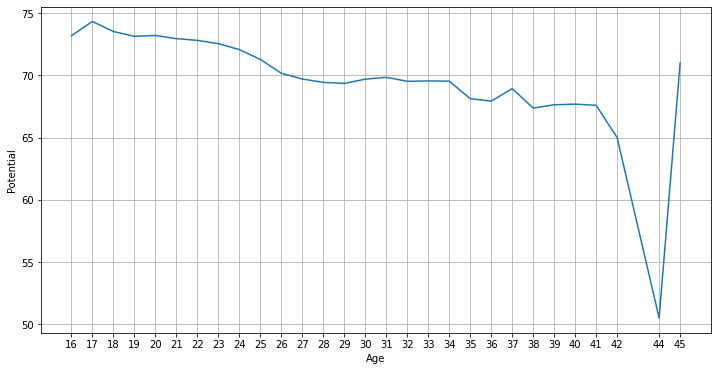

In [61]:
# Your Code for plot
plt.figure(figsize=(12,6))
tmp = df.groupBy('Age').agg({'Potential':'avg'}).select(['Age','avg(Potential)']).\
orderBy('Age').toPandas()
plt.plot(tmp.Age,tmp['avg(Potential)'])
plt.ylabel('Potential')
plt.grid()
plt.xticks(tmp.Age.unique())
plt.xlabel('Age');

## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for explore the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and only use the skillset attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



To make the later stage easier, we define the position group by using the position feature.
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [0]:
from pyspark.sql.functions import when,col
# Your code to complete
DEF= 'LB,LWB,RB,LCB,RCB,CB,RWB'.split(',')
FWD= 'RF,LF,LW,RS,RW,LS,CF,ST'.split(',')
MID= 'LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM'.split(',')
# Your code to select relevent features and filtering by leaving out the GK
clstr_df = df.filter(df.Position!='GK')

# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..

clstr_df = clstr_df.withColumn('Position_Group',when(col('Position').isin(DEF),'DEF')\
        .when(col('Position').isin(FWD),'FWD').when(col('Position').isin(MID),'MID'))

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [63]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import ClusteringEvaluator


FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features",)
df_kmeans_ = vecAssembler.transform(clstr_df).select('ID','features')
df_kmeans_.show(3)

+------+--------------------+
|    ID|            features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



In [0]:
# df_kmeans_.show()

Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from tqdm import tqdm_notebook as tqdm

In [67]:
cost = []
ks = list(range(2,20))
for k in tqdm(ks):
  kmeans = KMeans(k=k)
  model = kmeans.fit(df_kmeans_.select('features'))
  clstrs = model.transform(df_kmeans_)
  scr = ClusteringEvaluator().evaluate(clstrs)
  cost.append(scr)

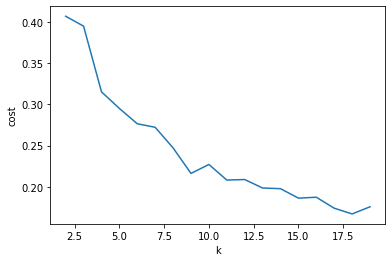

In [68]:
# Your Code
plt.plot(ks,cost)
plt.xlabel('k')
plt.ylabel('cost');


### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there any Position_Group belonging to particular Cluster?</li>
    </ol>

</div>
</div>




In [0]:
# Your code
k = 8
kmeans = KMeans(k=k,seed=55,initSteps=10,maxIter=100)
model = kmeans.fit(df_kmeans_.select('features'))
clstrd_df = model.transform(df_kmeans_)

In [70]:
clstr_df = clstr_df.join(clstrd_df.select(['ID','prediction']),on='ID')
clstr_df.groupby(['prediction']).pivot('Position_Group').\
agg({'Position_Group':'count'}).show()

+----------+----+----+----+
|prediction| DEF| FWD| MID|
+----------+----+----+----+
|         1|1296|  12| 676|
|         6|1671|   1|  23|
|         3|   1|1417| 118|
|         5|   4| 917|1396|
|         4|   5| 958|1220|
|         7|1249|   4| 380|
|         2|1119|  70|1702|
|         0| 521|  39|1323|
+----------+----+----+----+



## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skillset values to segment the players into 8 clusters. Now we want to see whether we could accuratly predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. Your target for classification is "Position_Group".

In [71]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','prediction']


vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(clstr_df).select('features','Position_Group')
df_class_.show(3)

+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In many data science modeling work, feature scaling is very important.
In here, we use standard scaling on the fetaures.

In [72]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420167...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [0]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [0]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

In [75]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     1|       2.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 10 rows




****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

def performance(model):
  predict_test=model.transform(test)
  y_true = [i.Target for i in predict_test.select('Target').collect()]
  y_pred = [i.prediction for i in predict_test.select('prediction').collect()]
  
  sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d',\
              xticklabels=['FWD','DEF','MID'],yticklabels=['FWD','DEF','MID']);
  plt.ylabel('True Values',rotation=90)
  plt.xlabel('Predicted Values')
  plt.title('Confusion Matrix')
  plt.show()
  print(classification_report(y_true,y_pred))

In [0]:
y_true = [i.Target for i in predict_test.select('Target').collect()]
y_pred = [i.prediction for i in predict_test.select('prediction').collect()]

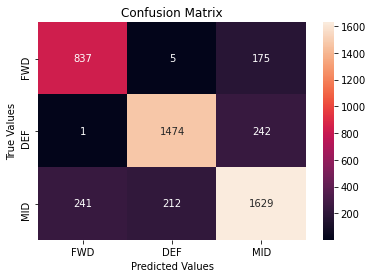

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Your Code
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt='d',\
            xticklabels=['FWD','DEF','MID'],yticklabels=['FWD','DEF','MID']);
plt.ylabel('True Values',rotation=90)
plt.xlabel('Predicted Values')
plt.title('Confusion Matrix');

In [79]:
from sklearn.metrics import classification_report
# Your Code
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1017
           1       0.87      0.86      0.87      1717
           2       0.80      0.78      0.79      2082

    accuracy                           0.82      4816
   macro avg       0.81      0.82      0.82      4816
weighted avg       0.82      0.82      0.82      4816



### 3.3 K-fold Cross-Validation

We surely missed something during the modeling work -- Hyperparameter tuning! We can use K-fold cross validation to find out the best hyperparameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyperparameters based on this cross-validation results</li>
        <li> Any difficuties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier,MultilayerPerceptronClassifier,DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Your code 


## Decision Tree Classifier

> Indented block



In [0]:
clf = DecisionTreeClassifier( labelCol="Target",)
grid = ParamGridBuilder().addGrid(clf.maxDepth, [2, 5, 7,10]).build()
evaluator = MulticlassClassificationEvaluator(labelCol='Target')
k_fld_clf = CrossValidator(estimator=clf,evaluator=evaluator,numFolds=3,\
                           seed=55,estimatorParamMaps=grid)
fnl_mdl = k_fld_clf.fit(train)

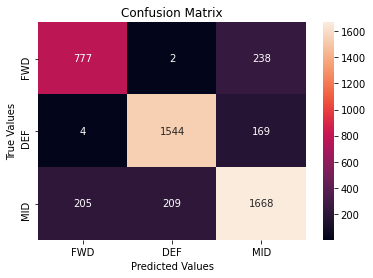

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1017
           1       0.88      0.90      0.89      1717
           2       0.80      0.80      0.80      2082

    accuracy                           0.83      4816
   macro avg       0.82      0.82      0.82      4816
weighted avg       0.83      0.83      0.83      4816



In [82]:
performance(fnl_mdl)

## Random Forest Classifier

In [0]:
clf = RandomForestClassifier( labelCol="Target",)
grid = ParamGridBuilder().addGrid(clf.maxDepth, [2, 5, 7,10])
grid = grid.addGrid(clf.numTrees, [20, 50, 150,200]).build()
evaluator = MulticlassClassificationEvaluator(labelCol='Target')
k_fld_clf = CrossValidator(estimator=clf,evaluator=evaluator,\
                           numFolds=3,seed=55,estimatorParamMaps=grid)
fnl_mdl = k_fld_clf.fit(train)

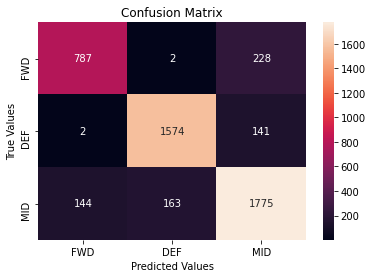

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      1017
           1       0.91      0.92      0.91      1717
           2       0.83      0.85      0.84      2082

    accuracy                           0.86      4816
   macro avg       0.86      0.85      0.85      4816
weighted avg       0.86      0.86      0.86      4816



In [84]:
performance(fnl_mdl)

## Multi layer Perceptron Classifier

In [0]:
clf = MultilayerPerceptronClassifier( labelCol="Target",seed=55)
grid = ParamGridBuilder().addGrid(clf.layers, [[32,64,3],[32,128,3]])\
.addGrid(clf.stepSize, [0.01, 0.03]).build()
evaluator = MulticlassClassificationEvaluator(labelCol='Target')
k_fld_clf = CrossValidator(estimator=clf,evaluator=evaluator,numFolds=3,\
                           seed=55,estimatorParamMaps=grid)
fnl_mdl = k_fld_clf.fit(train)

In [0]:
performance(fnl_mdl)